# Processing TESS data from TOI4504

In [1]:
%matplotlib inline
from process_flux_data import *
# import lightkurve as lk
# import pandas as pd
path = '../research/star_systems/TOI-4504/lightkurve/'


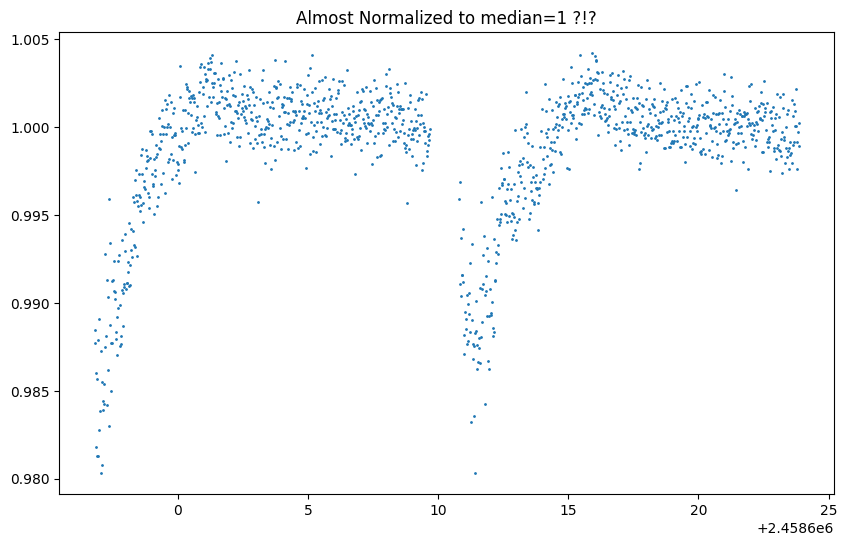

,time,flux,flux_err
0,2.458597e+06,0.988449,0.001239
1,2.458597e+06,0.987716,0.001239
2,2.458597e+06,0.986021,0.001239
3,2.458597e+06,0.981819,0.001239
4,2.458597e+06,0.981295,0.001239
...,...,...,...
1236,2.458624e+06,0.999157,0.001239
1237,2.458624e+06,0.997623,0.001239
1238,2.458624e+06,0.999709,0.001239
1239,2.458624e+06,0.998932,0.001239


In [4]:
df = csv2df(path+"11/11_QLP_1800.csv")
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Almost Normalized to median=1 ?!?")
df

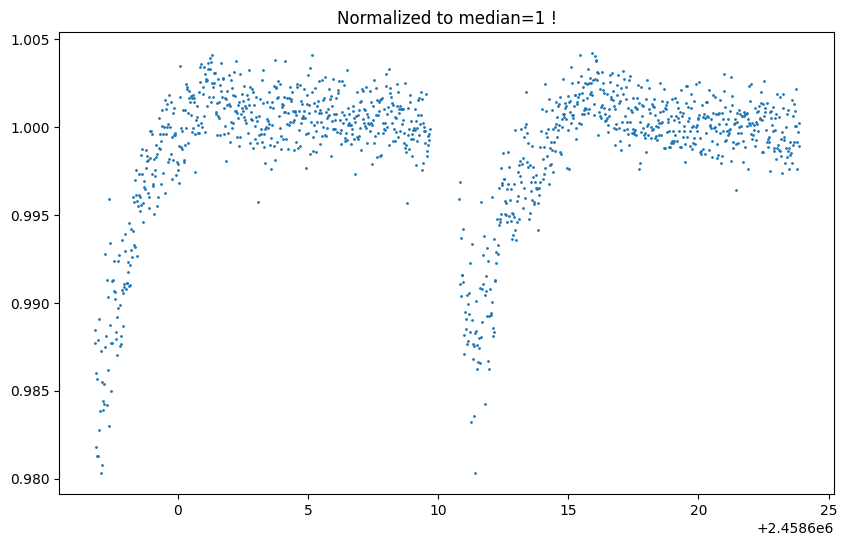

,time,flux,flux_err
0,2.458597e+06,0.988442,0.001239
1,2.458597e+06,0.987708,0.001239
2,2.458597e+06,0.986014,0.001239
3,2.458597e+06,0.981812,0.001239
4,2.458597e+06,0.981288,0.001239
...,...,...,...
1236,2.458624e+06,0.999150,0.001239
1237,2.458624e+06,0.997616,0.001239
1238,2.458624e+06,0.999702,0.001239
1239,2.458624e+06,0.998925,0.001239


In [3]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1 !")
df


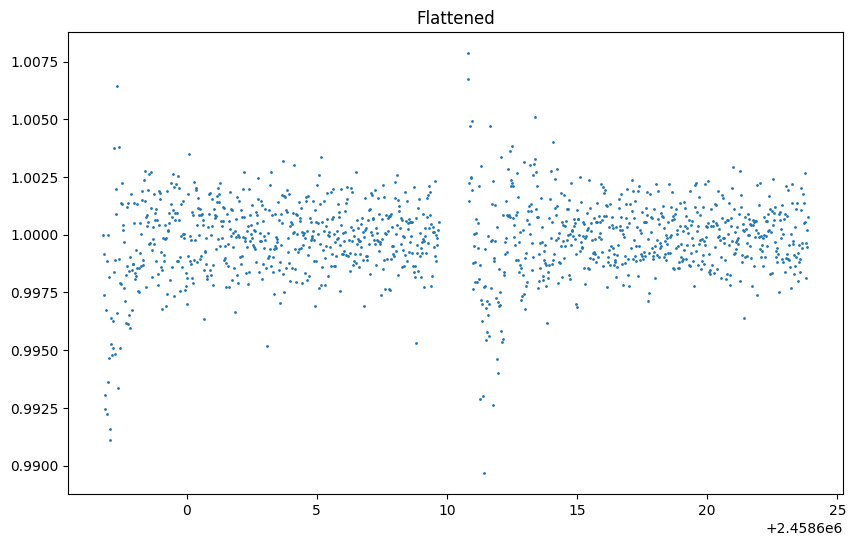

In [5]:
lc = df2lc(df)
lc2 = lc.flatten(
    window_length=101,  # Must be odd integer. Controls smoothness (longer → stronger smoothing).
    polyorder=2,        # Polynomial order (must be < window_length)
    break_tolerance=5,  # Split data at large time gaps.
    niters=3,           # Iterative sigma-clipping rounds. Remove outliers during flattening.
    sigma=3             # Outlier clipping threshold. Remove outliers during flattening.
)
# Use return_trend=True to retrieve the removed trend component.
df2 = lc2df(lc2)
plot_this(df2.time, [df2.flux], ["flux"], title="Flattened")
# df2

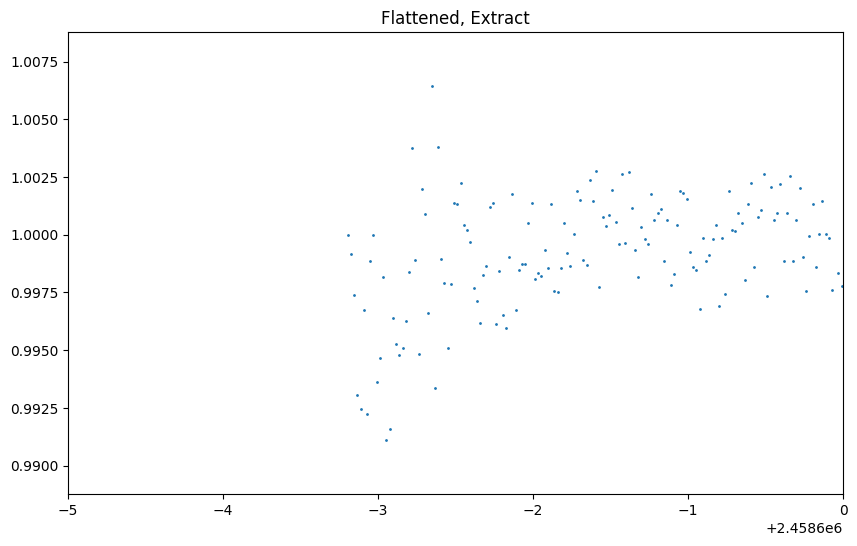

In [6]:
plot_this(df2.time, [df2.flux], ["flux"], title="Flattened, Extract", left=2458595, right=2458600)

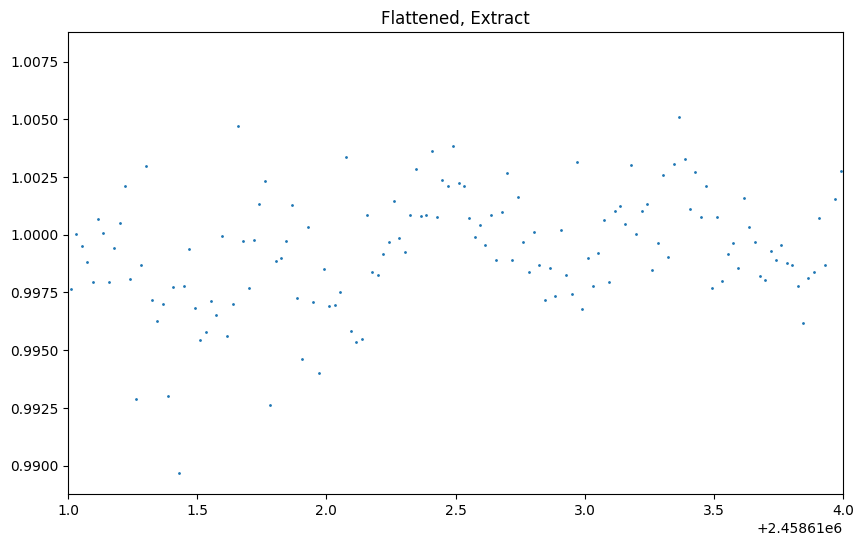

In [7]:
plot_this(df2.time, [df2.flux], ["flux"], title="Flattened, Extract", left=2458611, right=2458614)

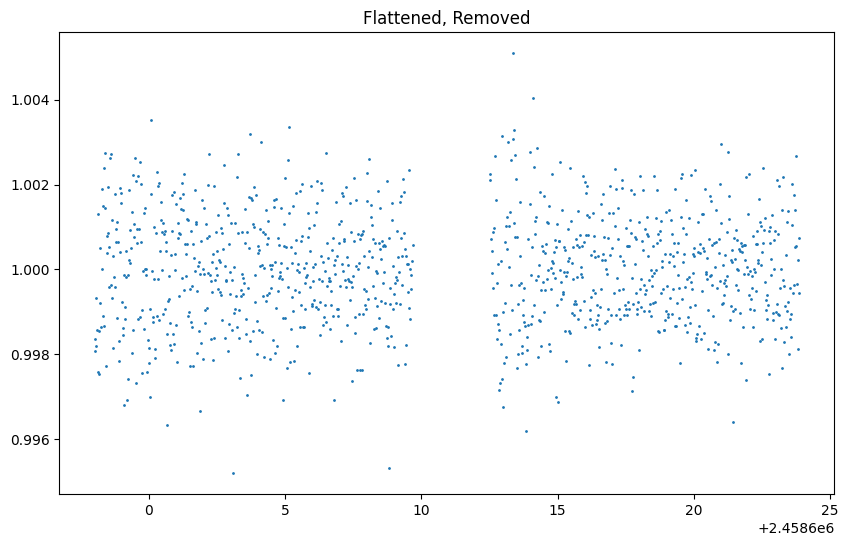

In [8]:
df3 = remove_from_df(df2, 2458610, 2458612.5)
df3 = remove_from_df(df3, 2458596, 2458598)
plot_this(df3.time, [df3.flux], ["flux"], title="Flattened, Removed")


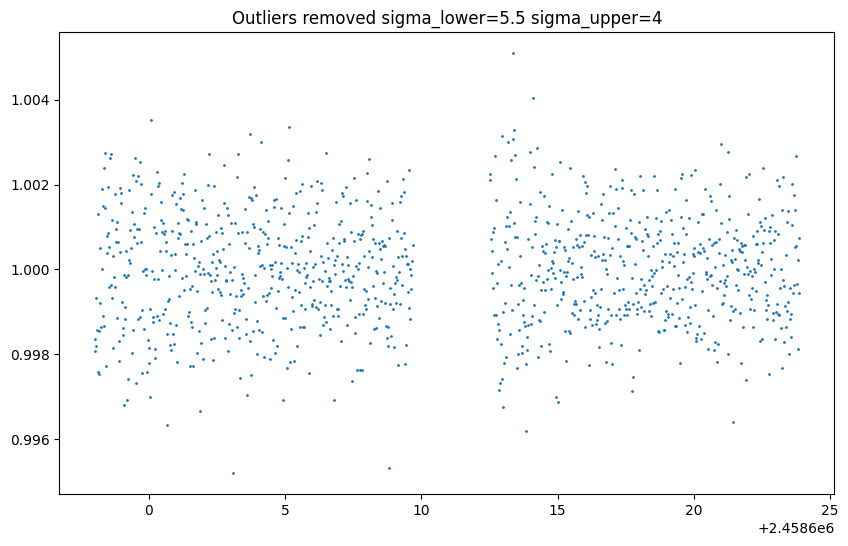

In [9]:
sigma_lower=5.5
sigma_upper=4
lc3 = df2lc(df3)
lc4 = lc3.remove_outliers(sigma_lower=sigma_lower, sigma_upper=sigma_upper)
df4 = lc2df(lc4)
plot_this(df4.time, [df4.flux], ["flux"], title=f"Outliers removed {sigma_lower=} {sigma_upper=}")
# df3

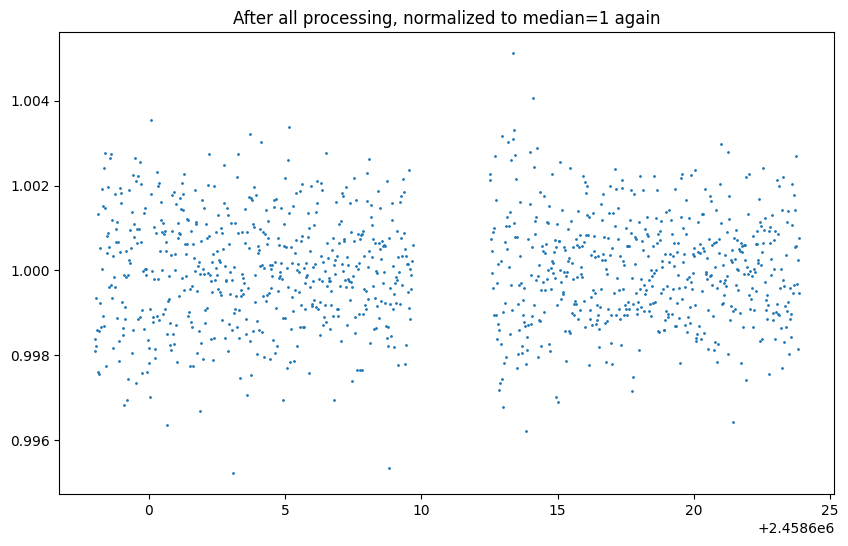

,time,flux,flux_err
0,2.458598e+06,0.998114,0.001248
1,2.458598e+06,0.998376,0.001248
2,2.458598e+06,0.998231,0.001248
3,2.458598e+06,0.999352,0.001247
4,2.458598e+06,0.998606,0.001247
...,...,...,...
1096,2.458624e+06,0.999683,0.001239
1097,2.458624e+06,0.998155,0.001239
1098,2.458624e+06,1.000249,0.001239
1099,2.458624e+06,0.999479,0.001239


In [11]:
median = median_flux(df4)
df5 = scale_flux(df4, 1/median)
plot_this(df5.time, [df5.flux], ["flux"], title="After all processing, normalized to median=1 again")
df5

### Alternatively: First remove bad data, than flatten

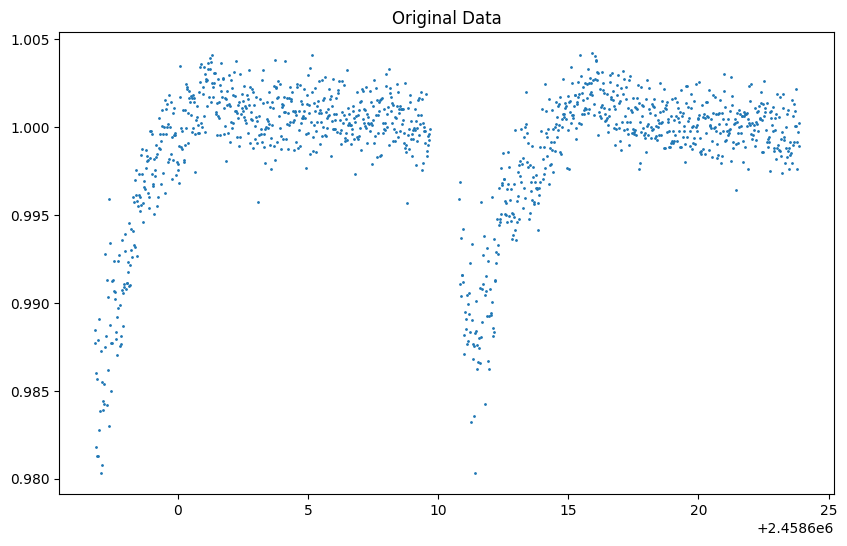

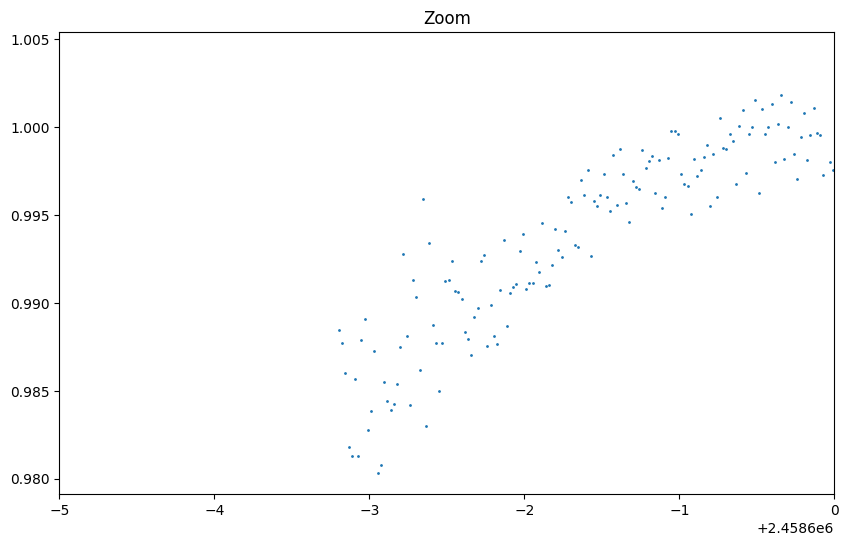

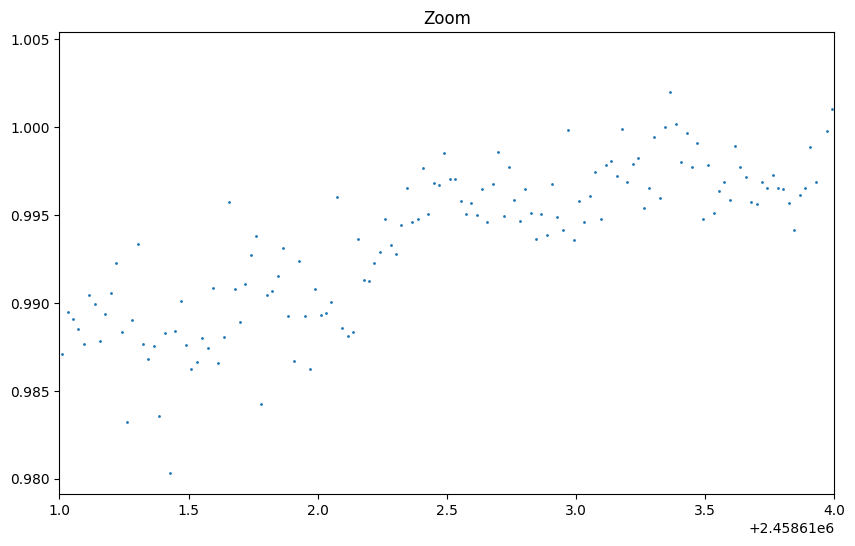

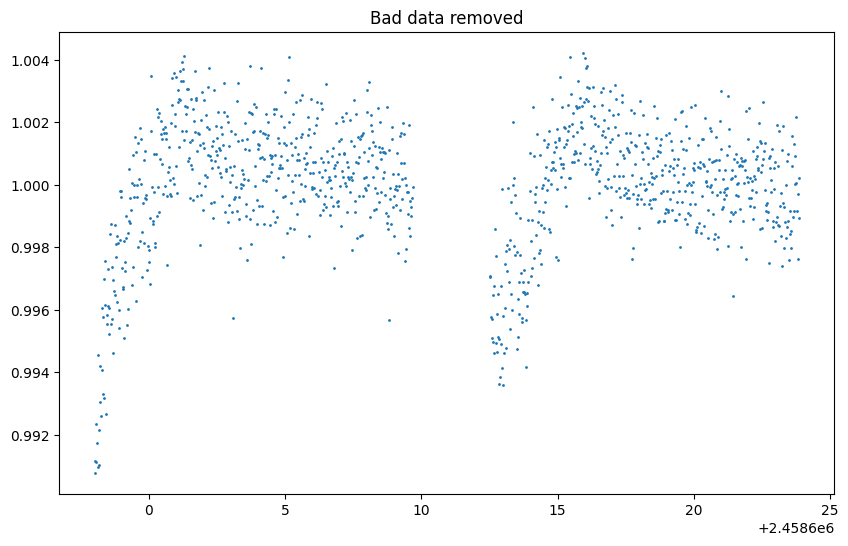

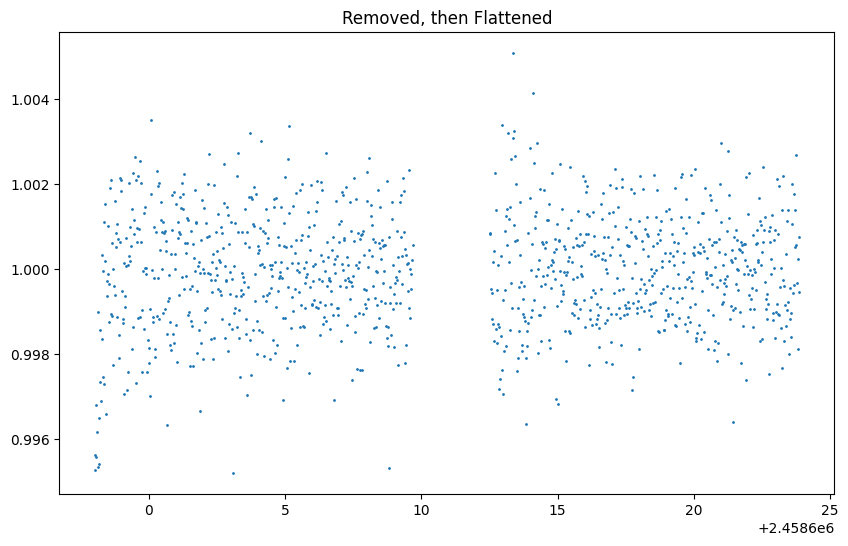

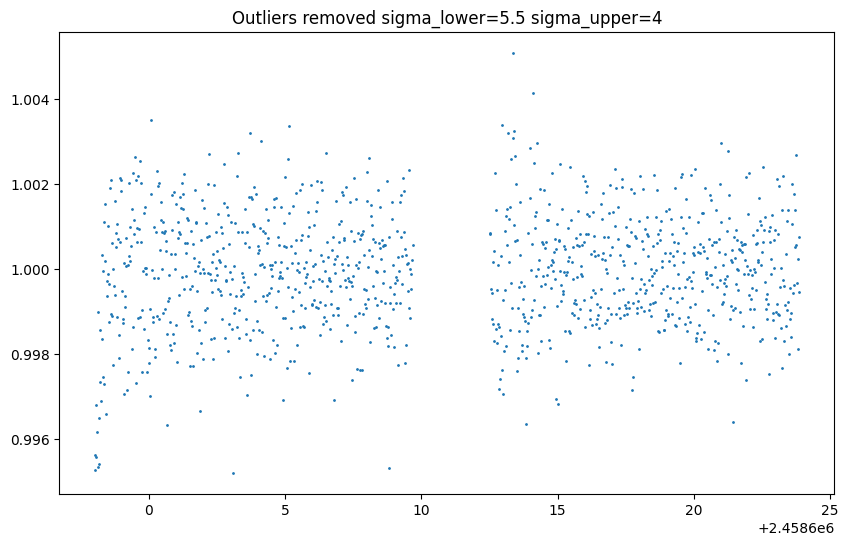

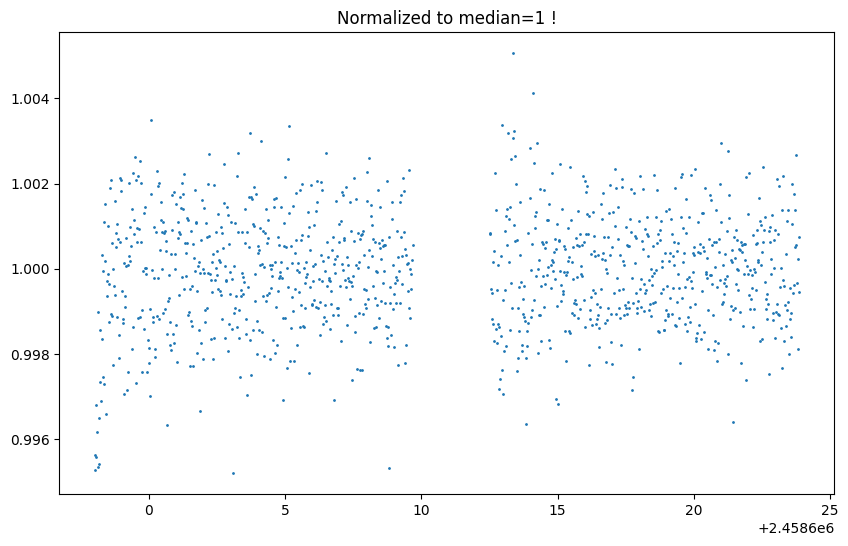

,time,flux,flux_err
0,2.458598e+06,0.995264,0.001244
1,2.458598e+06,0.995625,0.001244
2,2.458598e+06,0.995580,0.001244
3,2.458598e+06,0.996797,0.001244
4,2.458598e+06,0.996151,0.001244
...,...,...,...
1096,2.458624e+06,0.999652,0.001239
1097,2.458624e+06,0.998124,0.001239
1098,2.458624e+06,1.000218,0.001239
1099,2.458624e+06,0.999448,0.001239


In [13]:
df = csv2df(path+"11/11_QLP_1800.csv")
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original Data")
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458595, right=2458600)
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458611, right=2458614)
df2 = remove_from_df(df, 2458610, 2458612.5)
df2 = remove_from_df(df2, 2458596, 2458598)
plot_this(df2.time, [df2.flux], ["flux"], title="Bad data removed")
lc = df2lc(df2)
lc = lc.flatten(
    window_length=101,  # Must be odd integer. Controls smoothness (longer → stronger smoothing).
    polyorder=2,        # Polynomial order (must be < window_length)
    break_tolerance=5,  # Split data at large time gaps.
    niters=3,           # Iterative sigma-clipping rounds. Remove outliers during flattening.
    sigma=3             # Outlier clipping threshold. Remove outliers during flattening.
)
# Use return_trend=True to retrieve the removed trend component.
df3 = lc2df(lc)
plot_this(df3.time, [df3.flux], ["flux"], title="Removed, then Flattened")

sigma_lower=5.5
sigma_upper=4
lc3 = df2lc(df3)
lc4 = lc3.remove_outliers(sigma_lower=sigma_lower, sigma_upper=sigma_upper)
df4 = lc2df(lc4)
plot_this(df4.time, [df4.flux], ["flux"], title=f"Outliers removed {sigma_lower=} {sigma_upper=}")
median = median_flux(df)
df5 = scale_flux(df4, 1/median)
plot_this(df5.time, [df5.flux], ["flux"], title="Normalized to median=1 !")
df5



## Conclusion
To first flatten and thereafter remove bad data works slightly better than in reversed order.